

---



---


# Polynomial Regression


---




---


Polynomial regression is a type of regression analysis that models the relationship between the independent variable $x$ and the dependent variable $y$ using a polynomial function. Unlike simple linear regression, which fits a straight line to the data, polynomial regression fits a curve to capture non-linear relationships.

In polynomial regression, the relationship between $x$ and $y$ is expressed as:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_n x^n + \epsilon $$

Here, $$\theta_0, \theta_1, \ldots, \theta_n$$ are the coefficients of the polynomial terms, $n$ is the degree of the polynomial, and $\epsilon$ represents the error term.


Title: "Polynomial Regression Application"

In this notebook, we'll explore polynomial regression by generating random input features within the range of -3 to 3. We'll then generate target values using a quadratic function with added random noise:

$y = 0.5 * X^2 + X + 2 + RandomNoise$

Afterward, we will visualize the learning curve and apply a polynomial regression pipeline to the dataset.


In this notebook, we will explore polynomial regression. First, we will generate random input features within the range of -3 to 3. Next, we'll create target values using a quadratic function with added random noise. Afterward, we will visualize the learning curve and apply a polynomial regression pipeline to the dataset.


#Setup

In [1]:
# Common imports
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Establish a fixed random seed for consistent reproducibility in random processes
np.random.seed(42)


#Generating Data for Polynomial Regression Model

In [2]:
# Number of data points
m = 100

# Generate random input features between -3 and 3
X = 6 * np.random.rand(m, 1) - 3

# Generate target values using a quadratic function with added random noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


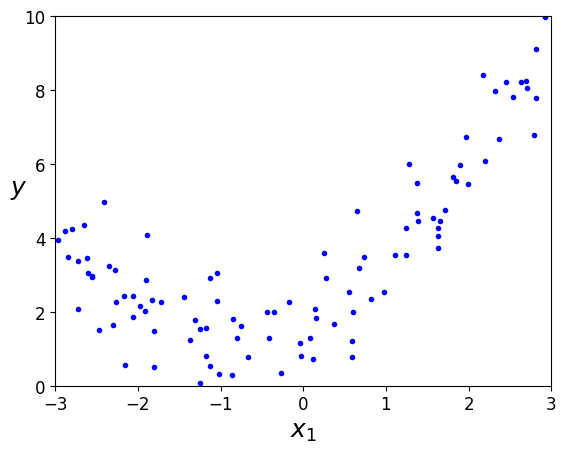

In [3]:
# Plot the generated data points
plt.plot(X, y, "b.")

# Set axis labels and limits
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# Show the plot

plt.show()


#Polynomial Feature Transformation
**PolynomialFeatures** is a transformer used to generate polynomial features from input features. It transforms the original feature matrix into a new feature matrix containing polynomial combinations of the original features up to a specified degree.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures transformer with degree=2 (quadratic features) and include_bias=False
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the input features X to generate polynomial features
X_poly = poly_features.fit_transform(X)

# Print the first data point in the original input features X
X[0]


array([-0.75275929])

In [5]:
# Print the polynomial features of the first data point
X_poly[0]

array([-0.75275929,  0.56664654])

# Use LinearRegression model to fits it on polynomial features

In [6]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression model from scikit-learn

# Fit a linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Print the intercept and coefficients of the linear regression model
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

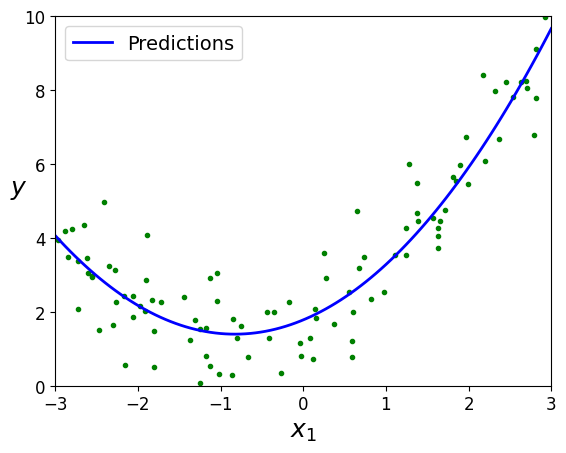

In [7]:

# Generate new input features for plotting
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

# Predict target values using the fitted linear regression model
y_new = lin_reg.predict(X_new_poly)

# Plot original data points and predictions
plt.plot(X, y, "g.")
plt.plot(X_new, y_new, "b-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()



#Performing polynomial regression with different degrees of polynomial features using pipelines

## Polynomial Regression Pipeline Steps:

1. **Create Polynomial Features**:
   - Polynomial features of specified degrees are generated using `PolynomialFeatures(degree=degree, include_bias=False)`. This step expands the input features to include higher-degree polynomial terms.

2. **Standardize Features**:
   - The generated polynomial features are standardized using `StandardScaler()`. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, facilitating the training process. The equation for StandardScaler is:  $z = (x - μ) / σ$


3. **Linear Regression Model**:

4. **Create Pipeline**:

5. **Fit Pipeline**:

6. **Make Predictions**:
   - Predictions are made using the fitted model on a new set of data (`X_new`) using `polynomial_regression.predict(X_new)`. This step generates predictions for the target variable based on the polynomial features and trained linear regression model.

This pipeline enables the creation of polynomial regression models with flexibility in choosing the degree of polynomial features, facilitating the exploration of different model complexities and their effects on predictions.


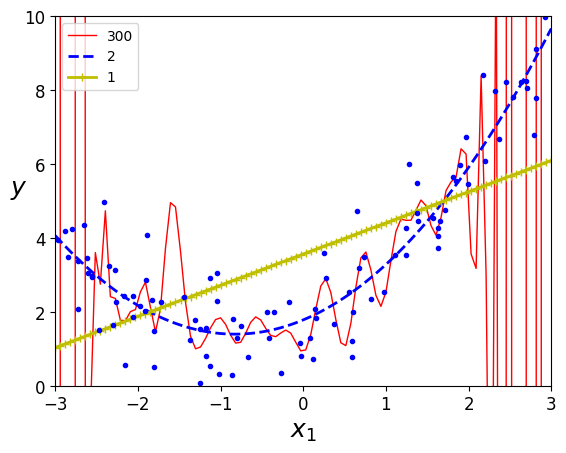

In [8]:
# Polynomial regression with different degrees
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Loop through different styles, widths, and degrees of polynomial features
for style, width, degree in (("r-", 1, 300), ("b--", 2, 2), ("y-+", 2, 1)):
    # Create polynomial features of specified degree
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Standardize features
    std_scaler = StandardScaler()
    # Linear regression model
    lin_reg = LinearRegression()
    # Create a pipeline with polynomial features, standard scaler, and linear regression
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    # Fit the pipeline on the data
    polynomial_regression.fit(X, y)
    # Make predictions using the fitted model
    y_newbig = polynomial_regression.predict(X_new)
    # Plot the predictions
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

# Plot the original data points
plt.plot(X, y, "b.", linewidth=3)
# Add legend and labels
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# Set the axis limits
plt.axis([-3, 3, 0, 10])

# Display the plot
plt.show()


#Plots the Learning Curves
**Learning curves** show how a machine learning model's performance changes with the size of the training dataset, helping to diagnose issues like overfitting or underfitting.



Here, splits the data into training and validation sets, iteratively increases the size of the training set, and computes the root mean squared error (RMSE) for both the training and validation sets.

Then, plots the learning curves showing how RMSE changes with the size of the training set.

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    # Initialize lists to store training and validation errors
    train_errors, val_errors = [], []

    # Iterate over increasing training set sizes
    for m in range(1, len(X_train) + 1):
        # Fit the model on the first m instances of the training set
        model.fit(X_train[:m], y_train[:m])

        # Compute predictions on both training and validation sets
        # The .predict() Method generates predictions based on a trained model.
        # It takes input data and outputs predictions.
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        # Compute RMSE for training and validation sets and append to lists
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the learning curves
    plt.plot(np.sqrt(train_errors), "g-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "y-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)


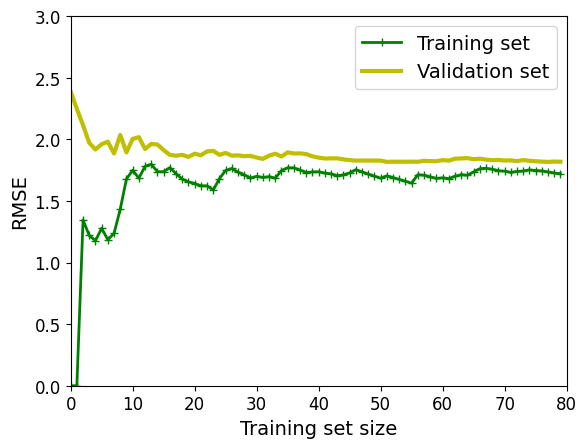

In [10]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

#### Linear Regression RMSE Plot

A plot comparing the Root Mean Squared Error (RMSE) of a linear regression model on training and validation datasets.
- The x-axis represents the training RMSE, while the y-axis represents the validation RMSE.
- The plot visualizes the model's performance on both datasets, allowing for comparison of training and generalization errors.


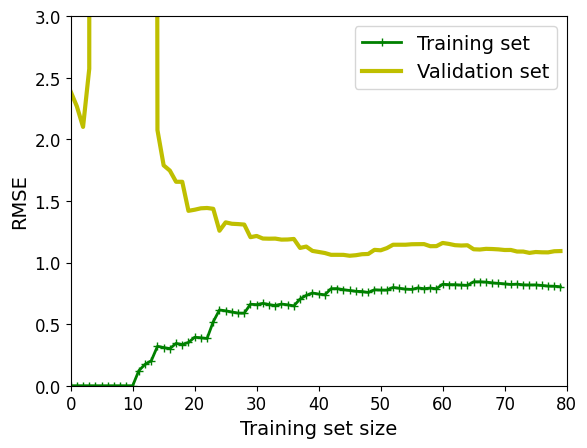

In [11]:
from sklearn.pipeline import Pipeline

# Create a polynomial regression pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

# Plot the learning curves for the polynomial regression pipeline
plot_learning_curves(polynomial_regression, X, y)

# Set the axis limits for better visualization
plt.axis([0, 80, 0, 3])

# Display the plot
plt.show()


#### PolyNomial Regression RMSE Plot

A plot comparing the Root Mean Squared Error (RMSE) of a PlyNomial regression model on training and validation datasets.
- The x-axis represents the training RMSE, while the y-axis represents the validation RMSE.